In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import obspy
import pandas as pd
from obspy.core import UTCDateTime as udt
import h5py


POROTOMO_CONTINUOUS_NODAL_WAVEFORM_PATH = "https://nrel-pds-porotomo.s3.amazonaws.com/Nodal"

def fetch_waveform(remote_path, remote_filename):
    url = remote_path + remote_filename
    return obspy.read(url)[0]

In [2]:
cat = pd.read_pickle("../data/processed/meq_cat.pkl")
cat

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source
EventID,,,,,,,,,,,
2201048,2016-03-14 06:47:46.450,39.79377,-119.01800,-0.106,-0.17,ML,0,0,0,0.04,LBL
2201049,2016-03-14 08:36:26.610,39.79442,-119.02161,-0.426,-0.48,ML,0,0,0,0.06,LBL
2201050,2016-03-14 08:39:05.230,39.79350,-119.01717,-0.106,0.07,ML,0,0,0,0.06,LBL
2201051,2016-03-14 12:11:34.920,39.79328,-119.01897,-0.119,0.05,ML,0,0,0,0.06,LBL
2201052,2016-03-16 22:03:10.240,39.79222,-119.01427,-0.424,-0.29,ML,0,0,0,0.06,LBL
2201053,2016-06-17 00:34:52.230,39.85725,-119.07287,5.000,1.53,ML,0,0,0,0.03,LBL


In [3]:
quaketimes = cat["DateTime"].apply(udt).to_list()[:-1]
evids = cat.index.to_list()[:-1]

## Most events are on 3/14/2016, onoe on 3/16/2016. One after the injection data coverage on 6/17/2016.

## Pull waveforms from 3/14 to start

In [4]:
filename_data = pd.read_pickle("../data/processed/continuous_waveform_filenames.pkl")
march14_files = filename_data[filename_data["date"]=="2016-3-14"]
march14_files

,filename,station,channel,date
15,/nodal_sac/001/20160314000028184.1.EHE.PG.sac,001,EHE,2016-03-14
16,/nodal_sac/001/20160314000028184.1.EHN.PG.sac,001,EHN,2016-03-14
17,/nodal_sac/001/20160314000028184.1.EHZ.PG.sac,001,EHZ,2016-03-14
70,/nodal_sac/002/20160314000018260.2.EHE.PG.sac,002,EHE,2016-03-14
71,/nodal_sac/002/20160314000018260.2.EHN.PG.sac,002,EHN,2016-03-14
...,...,...,...,...
13060,/nodal_sac/239/20160314235960916.239.EHN.PG.sac,239,EHN,2016-03-14
13061,/nodal_sac/239/20160314235960916.239.EHZ.PG.sac,239,EHZ,2016-03-14
13113,/nodal_sac/240/20160314000024626.240.EHE.PG.sac,240,EHE,2016-03-14
13114,/nodal_sac/240/20160314000024626.240.EHN.PG.sac,240,EHN,2016-03-14


In [6]:
st1 = fetch_waveform(POROTOMO_CONTINUOUS_NODAL_WAVEFORM_PATH,
                     march14_files.loc[17]["filename"])

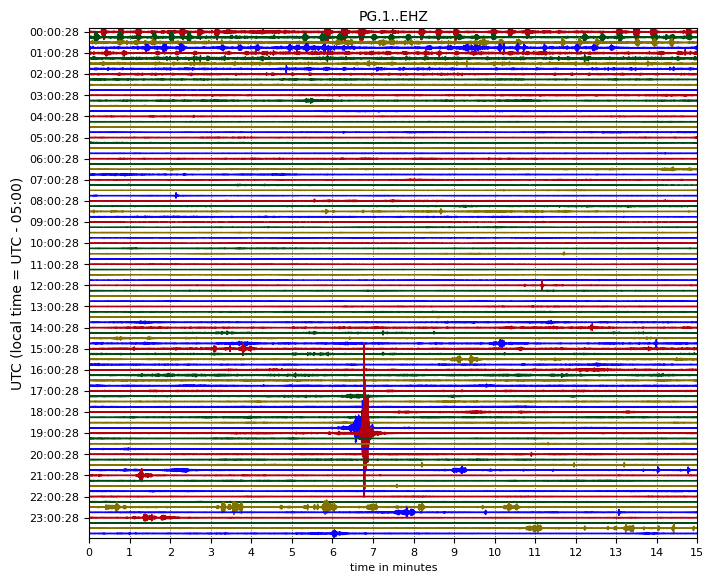

In [7]:
st1.plot(type="dayplot");plt.show()

In [8]:
meq1 = st1.slice(udt(cat.iloc[0]["DateTime"]), udt(cat.iloc[0]["DateTime"])+10)

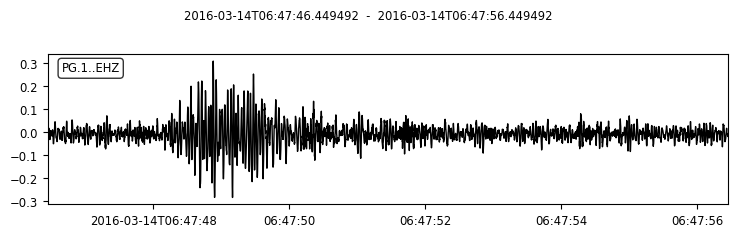

In [9]:
meq1.plot(); plt.show()

In [ ]:
st1 = fetch_waveform(march14_files.loc[17]["filename"], POROTOMO_CONTINUOUS_NODAL_WAVEFORM_PATH)

### Need

Continuous trace encompassing the quake(s)
Filter high pass at 0.1 Hz - length of template window

For each quake, for each station, for each component:
    - clip the quake at the event time and 10 seconds after

Calculate moveout times:
Distance from event to each station
    - station location
    - event location
Wave speed



In [ ]:
# create templates
 # save into hdf5 file
 # file
 # |- templates
 # |- eventid
 # |- station
 # |- channel

with h5py.File("/Volumes/T7/data/fmf_templates/templates.h5") as f:
    for i, quake in enumerate(quaketimes):
        evid = evids[i]
        # now select all files from the day of the quake
        files = filename_data[filename_data["date"]==quake.date.isoformat()]
        for file in files.to_dict(orient="records"):
            


In [11]:
# To save downloads, slice each quake template from one download
# Do by day so it works

# 2016-03-14

templates = {}
templates["waveforms"] = []
templates["station"] = []
templates["channel"] = []
templates["evid"] = []

badfiles = []

for file in filename_data[filename_data["date"]=="2016-03-14"].to_dict(orient="records"):
    try:
        waveform = fetch_waveform(POROTOMO_CONTINUOUS_NODAL_WAVEFORM_PATH,
                                            file["filename"])
        for i, t0 in enumerate(quaketimes):
            templates["waveforms"].append(waveform.slice(t0, t0 + 10))
            templates["evid"].append(evids[i])
            templates["station"] = file["station"]
            templates["channel"] = file["channel"]
        print(file["filename"])

    except Exception as e:
        print("Bad file: ", file["filename"])
        print(e)
        badfiles.append(file["filename"])




Bad file:  /nodal_sac/001/20160314000028184.1.EHE.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/001/20160314000028184.1.EHN.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/001/20160314000028184.1.EHZ.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/002/20160314000018260.2.EHE.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/002/20160314000018260.2.EHN.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/002/20160314000018260.2.EHZ.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/003/20160314000021036.3.EHE.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/003/20160314000021036.3.EHN.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/003/20160314000021036.3.EHZ.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/004/20160314000013274.4.EHE.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/004/20160314000013274.4.EHN.PG.sac
name 'evid' is not defined
Bad file:  /nodal_sac/004/20160314000013274.4.EHZ.PG.sac
name 'evid' is not 

KeyboardInterrupt: 

In [12]:
templates

{'waveforms': [PG.1..EHE | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449492Z | 500.0 Hz, 5001 samples,
  PG.1..EHN | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449492Z | 500.0 Hz, 5001 samples,
  PG.1..EHZ | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449492Z | 500.0 Hz, 5001 samples,
  PG.2..EHE | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.2..EHN | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.2..EHZ | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.3..EHE | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.3..EHN | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.3..EHZ | 2016-03-14T06:47:46.449492Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.4..EHE | 2016-03-14T06:47:46.449493Z - 2016-03-14T06:47:56.449493Z | 500.0 Hz, 5001 samples,
  PG.4.

In [ ]:
whole_waveforms

Error: Session cannot generate requests

In [56]:
files.to_dict?

Signature: files.to_dict(orient: 'str' = 'dict', into=<class 'dict'>)
Docstring:
Convert the DataFrame to a dictionary.

The type of the key-value pairs can be customized with the parameters
(see below).

Parameters
----------
orient : str {'dict', 'list', 'series', 'split', 'records', 'index'}
    Determines the type of the values of the dictionary.

    - 'dict' (default) : dict like {column -> {index -> value}}
    - 'list' : dict like {column -> [values]}
    - 'series' : dict like {column -> Series(values)}
    - 'split' : dict like
      {'index' -> [index], 'columns' -> [columns], 'data' -> [values]}
    - 'records' : list like
      [{column -> value}, ... , {column -> value}]
    - 'index' : dict like {index -> {column -> value}}

    Abbreviations are allowed. `s` indicates `series` and `sp`
    indicates `split`.

into : class, default dict
    The collections.abc.Mapping subclass used for all Mappings
    in the return value.  Can be the actual class or an empty
    instanc